In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.path.append('../scripts/')

import numpy as np

from utils import *
from data_utils import *
from plots import *

DATA_PATH = '../data/'

# Load data 

In [9]:
# Load train data
y, x, ids = load_csv_data(path.join(DATA_PATH, 'train.csv'))

# Class imbalances 

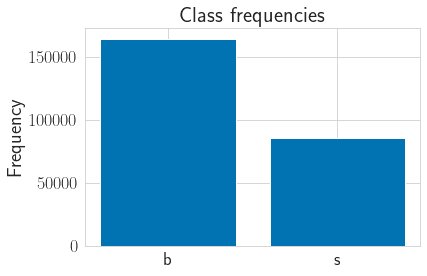

In [16]:
counts = [sum(y == LABELS['b']), sum(y == LABELS['s'])]

fig, ax = plt.subplots()

ax.bar([1, 2], counts)

ax.set(title='Class frequencies', ylabel='Frequency',
       xticks=[1,2], xticklabels=['b', 's']);

Unbalanced class: The relevant class s (signal) is underrepresented

# Feature Importance

In [45]:
feature_importance = {}
for i, f in enumerate(FEATURE_NAMES):
    feature_importance[f] = np.corrcoef(x[:, i], y)[0,1]

features_sorted = sorted(feature_importance, key=lambda k: abs(feature_importance[k]), reverse=True)

In [49]:
print(f'20 most informative features:\n{features_sorted[:20]}')

20 most informative features:
['DER_mass_transverse_met_lep', 'DER_met_phi_centrality', 'DER_mass_MMC', 'PRI_tau_pt', 'DER_pt_ratio_lep_tau', 'DER_pt_h', 'DER_mass_jet_jet', 'PRI_jet_leading_pt', 'DER_sum_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'DER_deltaeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_subleading_pt', 'DER_prodeta_jet_jet', 'PRI_met_sumet', 'PRI_jet_all_pt', 'PRI_jet_num']


In [51]:
print(f'10 least informative features:\n{features_sorted[-10:]}')

10 least informative features:
['PRI_lep_pt', 'PRI_met', 'DER_pt_tot', 'DER_mass_vis', 'DER_deltar_tau_lep', 'PRI_met_phi', 'PRI_tau_phi', 'PRI_lep_phi', 'PRI_lep_eta', 'PRI_tau_eta']


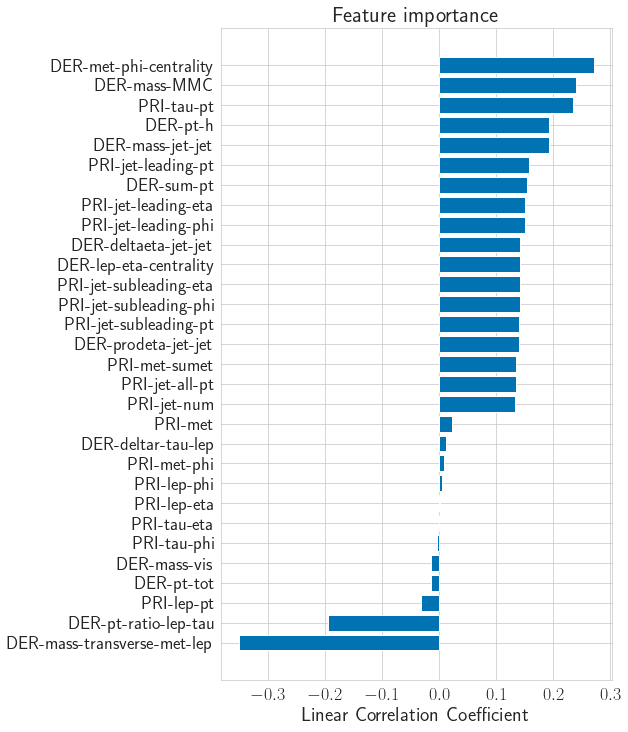

In [61]:
fig, ax = plt.subplots(figsize=(7, 12))

fsort = sorted(feature_importance, key=feature_importance.get)
yticks = [i for i in range(len(fsort))] 
ax.barh(yticks, [feature_importance[f] for f in fsort])

ax.set(title='Feature importance', xlabel='Linear Correlation Coefficient',
      yticks=yticks, yticklabels=['-'.join(f.split('_')) for f in fsort]);